In [1]:
from cortexlib.utils.plotting import plot_mean_fev
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../../analysis/mouse_m01_d2/results/simclr_neural_pc1_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/simclr_neural_pc1_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/simclr_neural_pc1_m03_d4.json"),
    Path("../../../analysis/mouse_m01_d2/results/vgg19_neural_pc1_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/vgg19_neural_pc1_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/vgg19_neural_pc1_m03_d4.json"),
    Path("../../../analysis/mouse_m01_d2/results/gabor_neural_pc1_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/gabor_neural_pc1_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/gabor_neural_pc1_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 264 rows from 9 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,vgg19_neural_pc1,m01_d2,conv2_2,NaN,0.407,0.431,3.604,3.604,0.152,NaN,NaN
1,vgg19_neural_pc1,m01_d2,conv2_2,10.0,0.342,0.362,3.604,3.604,0.172,-0.099,-0.118
2,vgg19_neural_pc1,m01_d2,conv2_2,20.0,0.367,0.389,3.604,3.604,0.169,-0.094,-0.118
3,vgg19_neural_pc1,m01_d2,conv2_2,50.0,0.404,0.427,3.604,3.604,0.167,-0.087,-0.119
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,3.604,3.604,0.166,-0.091,-0.120
...,...,...,...,...,...,...,...,...,...,...,...
95,vgg19_neural_pc1,m02_d3,conv3_4,20.0,0.425,0.463,2.455,2.455,0.164,-0.063,-0.130
96,vgg19_neural_pc1,m02_d3,conv3_4,50.0,0.422,0.460,2.455,2.455,0.166,-0.062,-0.128
97,vgg19_neural_pc1,m02_d3,conv3_4,100.0,0.430,0.469,2.455,2.455,0.167,-0.056,-0.124
98,vgg19_neural_pc1,m02_d3,conv4_4,NaN,0.402,0.438,2.075,2.075,0.167,NaN,NaN


In [2]:
# Filter to only rows where: for SimCLR and VGG19, 100 pcs; for Gabor, 10 pcs
df_pcs = df[
    ((df["model_target"].isin(["simclr_neural_pc1", "vgg19_neural_pc1"])) & (df["n_pcs"] == 100)) |
    ((df["model_target"] == "gabor_neural_pc1") & (df["n_pcs"] == 10))
]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,3.604,3.604,0.166,-0.091,-0.120
9,vgg19_neural_pc1,m01_d2,conv3_4,100.0,0.407,0.430,2.465,2.465,0.202,-0.056,-0.136
14,vgg19_neural_pc1,m01_d2,conv4_4,100.0,0.394,0.417,2.099,2.099,0.169,0.000,-0.106
19,vgg19_neural_pc1,m01_d2,conv5_4,100.0,0.279,0.296,2.352,2.352,0.125,0.252,-0.118
24,simclr_neural_pc1,m01_d2,fc,100.0,0.477,0.503,1.651,1.651,0.188,0.108,-0.065
33,vgg19_neural_pc1,m01_d2,fc2,100.0,0.263,0.280,2.201,2.201,0.107,0.447,-0.112
38,gabor_neural_pc1,m01_d2,gabor_large,10.0,-0.004,0.000,NaN,NaN,NaN,NaN,NaN
44,gabor_neural_pc1,m01_d2,gabor_medium,10.0,-0.016,0.000,NaN,NaN,NaN,NaN,NaN
50,gabor_neural_pc1,m01_d2,gabor_small,10.0,-0.018,0.000,NaN,NaN,NaN,NaN,NaN
56,simclr_neural_pc1,m01_d2,layer1,100.0,0.425,0.450,0.517,0.517,0.168,-0.114,-0.097


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,gabor_neural_pc1,gabor_large,10.0,-0.003667,0.000000,NaN,NaN,NaN,NaN,NaN
1,gabor_neural_pc1,gabor_medium,10.0,-0.008000,0.000000,NaN,NaN,NaN,NaN,NaN
2,gabor_neural_pc1,gabor_small,10.0,-0.007000,0.002000,NaN,NaN,NaN,NaN,NaN
3,simclr_neural_pc1,fc,100.0,0.455000,0.486000,1.628667,1.628667,0.137667,0.108,-0.057667
4,simclr_neural_pc1,layer1,100.0,0.415333,0.444000,0.515667,0.515667,0.129000,-0.114,-0.105333
5,simclr_neural_pc1,layer2,100.0,0.471000,0.503333,0.740667,0.740667,0.122333,-0.080,-0.086000
6,simclr_neural_pc1,layer3,100.0,0.496333,0.530000,0.956667,0.956667,0.141000,-0.005,-0.080333
7,simclr_neural_pc1,layer4,100.0,0.469667,0.501667,1.127667,1.127667,0.106667,0.085,-0.073333
8,vgg19_neural_pc1,conv2_2,100.0,0.390333,0.418333,3.608667,3.608667,0.116667,-0.091,-0.124667
9,vgg19_neural_pc1,conv3_4,100.0,0.378333,0.404667,2.459000,2.459000,0.139000,-0.056,-0.130000


In [4]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")

# Remove Gabor prefix from label
avg_metrics["layer"] = avg_metrics["layer"].str.replace(r"^gabor_", "", regex=True)

# Compute SEM and merge
sem_df = df_pcs.groupby('layer')['mean_fev'].sem().reset_index()
sem_df.columns = ['layer', 'sem_fev']
avg_metrics = avg_metrics.merge(sem_df, on='layer', how='left')

avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer,model,sem_fev
0,gabor_neural_pc1,large,10.0,-0.003667,0.000000,NaN,NaN,NaN,NaN,NaN,gabor,NaN
1,gabor_neural_pc1,medium,10.0,-0.008000,0.000000,NaN,NaN,NaN,NaN,NaN,gabor,NaN
2,gabor_neural_pc1,small,10.0,-0.007000,0.002000,NaN,NaN,NaN,NaN,NaN,gabor,NaN
3,simclr_neural_pc1,fc,100.0,0.455000,0.486000,1.628667,1.628667,0.137667,0.108,-0.057667,simclr,0.029816
4,simclr_neural_pc1,layer1,100.0,0.415333,0.444000,0.515667,0.515667,0.129000,-0.114,-0.105333,simclr,0.023288
5,simclr_neural_pc1,layer2,100.0,0.471000,0.503333,0.740667,0.740667,0.122333,-0.080,-0.086000,simclr,0.018260
6,simclr_neural_pc1,layer3,100.0,0.496333,0.530000,0.956667,0.956667,0.141000,-0.005,-0.080333,simclr,0.039509
7,simclr_neural_pc1,layer4,100.0,0.469667,0.501667,1.127667,1.127667,0.106667,0.085,-0.073333,simclr,0.041954
8,vgg19_neural_pc1,conv2_2,100.0,0.390333,0.418333,3.608667,3.608667,0.116667,-0.091,-0.124667,vgg19,0.044333
9,vgg19_neural_pc1,conv3_4,100.0,0.378333,0.404667,2.459000,2.459000,0.139000,-0.056,-0.130000,vgg19,0.046225


/Users/callummessiter/workspace/msc-neuro/research-project/cortexlib/cortexlib/utils/plotting.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["layer"] = df["layer"].str.replace(r"^gabor_", "", regex=True)
/Users/callummessiter/workspace/msc-neuro/research-project/cortexlib/cortexlib/utils/plotting.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["layer"] = pd.Categorical(


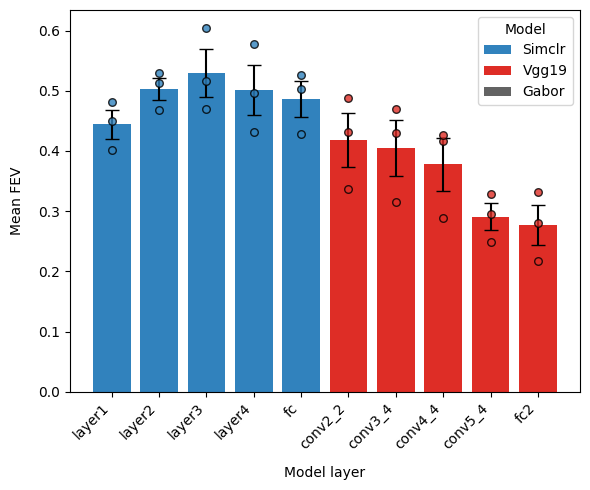

In [5]:
plt = plot_mean_fev(avg_metrics, df_pcs, remove_gabor=True)
plt.savefig("./figures/prediction_neural_pc1.svg", format='svg')
plt.show()

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon, binomtest

# --- helpers ---
def per_mouse_summary(df, model_prefix, agg='max', layer_subset=None, n_pcs_subset=None):
    """Return a Series indexed by mouse_id with one FEV summary per mouse for a given model."""
    sub = df[df['model_target'].str.startswith(model_prefix)].copy()
    if layer_subset is not None:
        sub = sub[sub['layer'].isin(layer_subset)]
    if n_pcs_subset is not None:
        sub = sub[sub['n_pcs'].isin(n_pcs_subset)]
    # choose one scalar per mouse
    g = sub.groupby('mouse_id')['mean_fev']
    if agg == 'max':
        out = g.max()
    elif agg == 'mean':
        out = g.mean()
    elif agg == 'median':
        out = g.median()
    else:
        raise ValueError("agg must be one of {'max','mean','median'}")
    return out

def paired_effect(df, model_a, model_b, agg='max', B=10_000, seed=0, **kwargs):
    """Paired analysis across mice for model_a - model_b."""
    a = per_mouse_summary(df, model_a, agg=agg, **kwargs)
    b = per_mouse_summary(df, model_b, agg=agg, **kwargs)
    common = a.index.intersection(b.index)
    diffs = (a.loc[common] - b.loc[common]).to_numpy()

    # remove exact zeros for tests that require nonzero diffs
    nonzero = np.abs(diffs) > 0
    diffs_nz = diffs[nonzero]
    n_pairs = diffs_nz.size

    # Hodges–Lehmann for paired = median of diffs
    hl = float(np.median(diffs))

    # Bootstrap CI for the median difference
    rng = np.random.default_rng(seed)
    boot = np.array([
        np.median(rng.choice(diffs, size=diffs.size, replace=True))
        for _ in range(B)
    ])
    lo, hi = np.percentile(boot, [2.5, 97.5])

    # Exact Wilcoxon (if at least 1 nonzero diff)
    wilcoxon_p = None
    wilcoxon_W = None
    if n_pairs > 0:
        res = wilcoxon(diffs_nz, zero_method='wilcox', alternative='two-sided', method='exact')
        wilcoxon_W = float(res.statistic)
        wilcoxon_p = float(res.pvalue)

    # Sign test (binomial) as an additional, very transparent check
    k_pos = int((diffs_nz > 0).sum())
    n = int(n_pairs)
    sign_p = binomtest(k_pos, n, 0.5, alternative='two-sided').pvalue if n > 0 else None

    return {
        'mice': list(common),
        'model_a_vals': dict(zip(common, a.loc[common])),
        'model_b_vals': dict(zip(common, b.loc[common])),
        'paired_diffs': dict(zip(common, diffs)),
        'HL_median_diff': hl,
        'boot_CI_95': (lo, hi),
        'wilcoxon_W': wilcoxon_W,
        'wilcoxon_p_exact_two_sided': wilcoxon_p,
        'sign_test_two_sided_p': float(sign_p) if sign_p is not None else None,
        'note': 'With n=3 pairs, the smallest achievable two-sided p is 0.25; interpret effect sizes primarily.'
    }

def to_dataframe(result, model_a, model_b):
    rows = []
    for mouse in result["mice"]:
        rows.append({
            "mouse": mouse,
            f"{model_a}": result["model_a_vals"][mouse],
            f"{model_b}": result["model_b_vals"][mouse],
            "diff": result["paired_diffs"][mouse],
            "HL_median_diff": result["HL_median_diff"],
            "boot_CI_low": result["boot_CI_95"][0],
            "boot_CI_high": result["boot_CI_95"][1],
            "wilcoxon_W": result["wilcoxon_W"],
            "wilcoxon_p": result["wilcoxon_p_exact_two_sided"],
            "sign_test_p": result["sign_test_two_sided_p"]
        })
    return pd.DataFrame(rows)

out_simclr_vs_vgg = paired_effect(df, model_a='simclr_neural', model_b='vgg19_neural', agg='max')
out_simclr_vs_gabor = paired_effect(df, model_a='simclr_neural', model_b='gabor_neural', agg='max')

out_simclr_vs_vgg_df = to_dataframe(out_simclr_vs_vgg, model_a='simclr_neural', model_b='vgg19_neural')
out_simclr_vs_gabor_df = to_dataframe(out_simclr_vs_gabor, model_a='simclr_neural', model_b='gabor_neural')

In [10]:
out_simclr_vs_vgg_df

,mouse,simclr_neural,vgg19_neural,diff,HL_median_diff,boot_CI_low,boot_CI_high,wilcoxon_W,wilcoxon_p,sign_test_p
0,m01_d2,0.548,0.440,0.108,0.127,0.108,0.152,0.0,0.25,0.25
1,m02_d3,0.615,0.488,0.127,0.127,0.108,0.152,0.0,0.25,0.25
2,m03_d4,0.488,0.336,0.152,0.127,0.108,0.152,0.0,0.25,0.25


In [13]:
out_simclr_vs_gabor_df

,mouse,simclr_neural,gabor_neural,diff,HL_median_diff,boot_CI_low,boot_CI_high,wilcoxon_W,wilcoxon_p,sign_test_p
0,m01_d2,0.548,0.000,0.548,0.548,0.48,0.615,0.0,0.25,0.25
1,m02_d3,0.615,0.000,0.615,0.548,0.48,0.615,0.0,0.25,0.25
2,m03_d4,0.488,0.008,0.480,0.548,0.48,0.615,0.0,0.25,0.25
